In [665]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import numpy as np
import ast
pd.set_option('display.max_colwidth', 200)

In [666]:
# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("Miles1999/interactive-COT-data",  split="train")

Resolving data files:   0%|          | 0/43 [00:00<?, ?it/s]

In [708]:
# adding the accuracy by error, 10 types in total, 9 errors and 1 correct explanation
# each error will be one column and the output for each cell will be [verificaion accuracy (binary), step identification accuracy(binary), time per question]
def make_error_stats(df):
    NA = [] # correct explanatin N/A
    CA = [] 
    CO = []
    CV = []
    CS = []
    MS =[]
    HA = []
    UC =[]
    OP =[]
    FC =[]
    for i in range(len(df)):
        for file in df["samples"][i]:
            error_type = file['file'].split("/")[-1].split("_")[-2]
            stats_list = []
            error_identification = 0
            step_identification = 0 
            time_elapse = 0
            if (file["label"] == 'correct' and file["humanAnswer"] == 'correct') or (file["label"] == 'wrong' and file["humanAnswer"] == 'incorrect'):
                error_identification = 1
                if file["actualWrongstep"] == file['userInputWrongStep']:
                    step_identification = 1
            time_elapse = file["elapsedSeconds"]
            stats_list = [error_identification, step_identification, time_elapse]
            match error_type:
                case "NA": 
                    NA.append(stats_list)
                case "CA":
                    CA.append(stats_list)
                case "CO":
                    CO.append(stats_list)
                case "CV":
                    CV.append(stats_list)
                case "CS":
                    CS.append(stats_list)
                case "MS":
                    MS.append(stats_list)
                case "HA":
                    HA.append(stats_list)
                case "UC":
                    UC.append(stats_list)
                case "OP":
                    OP.append(stats_list)
                case "FC":
                    FC.append(stats_list)
    return NA, CA, CO, CV, CS, MS, HA, UC, OP, FC

In [727]:
def make_button_click_stats(df):
    temp_df = df
    total_play = []
    total_stop =[]
    total_next =[]
    total_prev=[]
    for i in range(len(temp_df)):
        files = temp_df["samples"][i]
        play_b = 0
        stop_b = 0
        next_b = 0
        prev_b = 0
        for file in files:
            click_counts = file["clickCounts"]
            play_b+=click_counts["play"]
            stop_b+=click_counts["stop"]
            next_b+=click_counts["next"]
            prev_b+=click_counts["prev"]
        total_play.append(play_b/10)
        total_stop.append(stop_b/10)
        total_next.append(next_b/10)
        total_prev.append(prev_b/10)
    return total_play, total_stop, total_next, total_prev

In [728]:

# making the wrong step identification accuracy based on all 10 quesitons 
def make_wrong_step_identification_accuracy(df):
    acc_lst = []
    for i in range(len(df)):
        total_counter = 0
        indentified_counter = 0
        for file in df["samples"][i]:
            if file['humanAnswer'] == "incorrect":
                total_counter +=1
                if(file['actualWrongstep'] == file["userInputWrongStep"]):
                    indentified_counter+=1
        identification_rate = (indentified_counter/total_counter)*100
        acc_lst.append(identification_rate)
    return acc_lst

In [729]:
df_dataset = ds.to_pandas()
df_dataset['format'] = df_dataset['samples'].apply(
    lambda arr: arr[0]['file'].split('/')[3].split('_')[1] if len(arr) > 0 and 'file' in arr[0] else None
)
df_dataset['avgTimeCorrect'] = df_dataset['avgTimeCorrect'].astype(float)
df_dataset['avgTimeIncorrect'] = df_dataset['avgTimeIncorrect'].astype(float)
df_dataset["average_time"] = (df_dataset['avgTimeCorrect']+(df_dataset['avgTimeIncorrect']*9))/10
df_dataset["wrong_step_accuracy"] = make_wrong_step_identification_accuracy(df_dataset)
NA, CA, CO, CV, CS, MS, HA, UC, OP, FC = make_error_stats(df_dataset)
total_play, total_stop, total_next, total_prev = make_button_click_stats(df_dataset)
df_dataset["NA"] = NA
df_dataset["CA"] = CA
df_dataset["CO"] = CO
df_dataset["CV"] = CV
df_dataset["CS"] = CS
df_dataset["MS"] = MS
df_dataset["HA"] = HA
df_dataset["UC"] = UC
df_dataset["OP"] = OP
df_dataset["FC"] = FC
df_dataset["play_button_count"] = total_play
df_dataset["stop_button_count"] = total_stop
df_dataset["next_button_count"] = total_next
df_dataset["prev_button_count"] = total_prev


In [730]:
df_dataset

overallAccuracy correctItemAccuracy incorrectItemAccuracy  avgTimeCorrect  \
0                80              100.00                 75.00           42.96   
1                70              100.00                 77.78           82.53   
2                90              100.00                 88.89           56.47   
3                50              100.00                 55.56          112.87   
4                80              100.00                 77.78           82.37   
5                60              100.00                 50.00           99.21   
6                90              100.00                 87.50           64.68   
7                90              100.00                 88.89           32.51   
8                90              100.00                 88.89          119.76   
9                70              100.00                 66.66           44.05   
10               90              100.00                 87.50           63.53   
11               90              100.00                 88.88          183.96   
12               90              100.00                 88.89           53.92   
13               90              100.00                 88.88          103.13   
14               80              100.00                 77.78           20.34   
15               70                0.00                 77.78           33.79   
16               80              100.00                 75.00          110.44   
17               90              100.00                 88.89          100.98   
18               70              100.00                 66.67           97.81   
19               70              100.00                 66.69          128.90   
20               80              100.00                 77.78           83.58   
21               80               50.00                 87.50           95.13   
22               90              100.00                 88.88            9.15   
23               80              100.00                 55.56           66.85   
24               70               50.00                 75.00           50.57   
25               90              100.00                 87.50           72.28   
26               90              100.00                 88.88           17.70   
27               80              100.00                 77.78            4.16   
28               90              100.00                 88.89           80.18   
29               70              100.00                 66.67          144.83   
30               70              100.00                 62.50           55.18   
31               70              100.00                 66.67           56.73   
32               80              100.00                 77.78           87.53   
33              100              100.00                100.00          169.16   
34               80              100.00                 77.78          120.06   
35               80              100.00                 77.78           40.09   
36               70              100.00                 66.67          133.55   
37               70              100.00                  62.5           25.84   
38               90              100.00                 88.89           32.18   
39               70              100.00                 66.67           87.37   
40               90              100.00                 88.88           30.35   
41               90              100.00                 88.89           84.05   

    avgTimeIncorrect  \
0              36.93   
1              81.03   
2              55.60   
3              85.89   
4              66.80   
5              49.07   
6              77.76   
7              79.94   
8              89.34   
9              74.51   
10             60.81   
11             50.06   
12             41.61   
13             74.32   
14             75.69   
15             55.23   
16             65.61   
17             59.28   
18             65.23   
19             86.67   
20             7

In [731]:
df_phd = pd.read_csv("phd_student_result.csv")
df_phd

overallAccuracy  correctItemAccuracy  incorrectItemAccuracy  \
0              100                100.0                 100.00   
1               90                100.0                  88.89   
2              100                100.0                 100.00   
3               90                  0.0                 100.00   
4               90                100.0                  88.89   
5               80                100.0                  77.78   
6               60                100.0                  44.45   
7               70                  0.0                  77.78   

   avgTimeCorrect  avgTimeIncorrect  \
0           84.72             45.52   
1            2.98             46.56   
2          145.60             48.36   
3          191.84             67.18   
4           39.97             52.36   
5          112.13             52.71   
6           68.24             53.66   
7          120.95             74.58   

                                                                                                                                                                                                   samples  \
0  [{'file': 'interactive-llm-xai/evaluation/eval_interfaces/interactive_graph_explanations/interactive_graph_right_NA_4.html', 'id': 'right_NA_4', 'label': 'correct', 'humanAnswer': 'correct', 'actu...   
1  [{'file': 'interactive-llm-xai/evaluation/eval_interfaces/traditional_cot_explanations/traditional_cot_right_NA_5.html', 'id': 'right_NA_5', 'label': 'correct', 'humanAnswer': 'correct', 'actualWr...   
2  [{'file': 'interactive-llm-xai/evaluation/eval_interfaces/interactive_graph_explanations/interactive_graph_right_NA_3.html', 'id': 'right_NA_3', 'label': 'correct', 'humanAnswer': 'correct', 'actu...   
3  [{'file': 'interactive-llm-xai/evaluation/eval_interfaces/interactive_nat_lang_explanations/interactive_natural_lang_right_NA_4.html', 'id': 'right_NA_4', 'label': 'correct', 'humanAnswer': 'incor...   
4  [{'file': 'interactive-llm-xai/evaluation/eval_interfaces/interactive_nat_lang_explanations/interactive_natural_lang_right_NA_6.html', 'id': 'right_NA_6', 'label': 'correct', 'humanAnswer': 'corre...   
5  [{'file': 'interactive-llm-xai/evaluation/eval_interfaces/interactive_nat_lang_explanations/interactive_natural_lang_right_NA_7.html', 'id': 'right_NA_7', 'label': 'correct', 'humanAnswer': 'corre...   
6  [{'file': 'interactive-llm-xai/evaluation/eval_interfaces/interactive_coding_explanations/interactive_code_right_NA_3.html', 'id': 'right_NA_3', 'label': 'correct', 'humanAnswer': 'correct', 'actu...   
7  [{'file': 'interactive-llm-xai/evaluation/eval_interfaces/traditional_cot_explanations/traditional_cot_right_NA_4.html', 'id': 'right_NA_4', 'label': 'correct', 'humanAnswer': 'incorrect', 'actual...   

                                                                                                                   subjective_feedback  \
0                                                                                                                                  NaN   
1                                                                                                                                  NaN   
2                                                                                                                                  NaN   
3                                                                                                                                  NaN   
4                                                                                                                                  NaN   
5                                                                                                                                  NaN   
6  One selection was wrong, I misclicked on the "correct" button but the answer was in fact in correct. I think it should the 7th one?   
7                                                                                                

In [732]:
df_total = pd.concat([df_dataset, df_phd])


In [733]:
summary = df_total['format'].value_counts()
summary

format
coding    13
graph     13
cot       12
nat       12
Name: count, dtype: int64

In [693]:
#df_total[["session_id","wrong_step_accuracy","format"]]


In [725]:
# def get_button_stats(df):
#     temp_df = df
#     total_play = []
#     total_stop =[]
#     total_next =[]
#     total_prev=[]
#     for i in range(len(temp_df)):
#         files = temp_df["samples"][i]
#         play_b = 0
#         stop_b = 0
#         next_b = 0
#         prev_b = 0
#         data_list = ast.literal_eval(files.replace("}\n {", "}, {"))
#         for file in data_list:
#             click_counts = file["clickCounts"]
#             play_b+=click_counts["play"]
#             stop_b+=click_counts["stop"]
#             next_b+=click_counts["next"]
#             prev_b+=click_counts["prev"]
#         total_play.append(play_b/10)
#         total_stop.append(stop_b/10)
#         total_next.append(next_b/10)
#         total_prev.append(prev_b/10)
#     return total_play, total_stop, total_next, total_prev
        
# total_play, total_stop, total_next, total_prev = get_button_stats(df_phd)
# df_phd["play_button_count"] = total_play
# df_phd["stop_button_count"] = total_stop
# df_phd["next_button_count"] = total_next
# df_phd["prev_button_count"] = total_prev

# df_phd.to_csv("phd_student_result.csv",header= True, index = False)


In [676]:
def get_average_accuracy(df, format_type):
    temp_df = df[df["format"] == format_type]
    return temp_df['overallAccuracy'].mean()

print("graph: " + str(get_average_accuracy(df_total,"graph"))+" %")
print("cot: " + str(get_average_accuracy(df_total,"cot"))+" %")
print("code: " + str(get_average_accuracy(df_total,"coding"))+" %")
print("nl: " + str(get_average_accuracy(df_total,"nat"))+" %")

graph: 90.76923076923077 %
cot: 72.5 %
code: 76.92307692307692 %
nl: 83.33333333333333 %


In [677]:
def get_average_time(df, format_type):
    temp_df = df[df["format"] == format_type]
    return temp_df['average_time'].mean()


print("graph: " + str(get_average_time(df_total,"graph")) + " s")
print("cot: " + str(get_average_time(df_total,"cot"))+ " s")
print("code: " + str(get_average_time(df_total,"coding"))+ " s")
print("nl: " + str(get_average_time(df_total,"nat"))+ " s")

graph: 57.66561538461537 s
cot: 72.22383333333333 s
code: 55.709615384615375 s
nl: 62.18091666666667 s


In [678]:
def get_wrong_step_identification_accuracy(df, format_type):
    temp_df = df[df["format"] == format_type]
    return temp_df['wrong_step_accuracy'].mean()



print("graph: " + str(get_wrong_step_identification_accuracy(df_total,"graph")) + " s")
print("cot: " + str(get_wrong_step_identification_accuracy(df_total,"cot"))+ " s")
print("code: " + str(get_wrong_step_identification_accuracy(df_total,"coding"))+ " s")
print("nl: " + str(get_wrong_step_identification_accuracy(df_total,"nat"))+ " s")

graph: 88.4004884004884 s
cot: 61.4484126984127 s
code: 70.3113553113553 s
nl: 77.56613756613757 s


In [679]:
# output: verification accuracy, steps identification accuracy , time per question
def get_average_stats_by_error (df,format_type, error_type):
    temp_df = df[df["format"] == format_type]
    error_column = temp_df[error_type]
    total_explanation = 0
    total_verified = 0
    total_step_correct =  0
    total_time = 0
    for stats in error_column:
        if isinstance(stats, str):
            total_explanation+=1
            stripped_stats = stats.strip("[").strip("]").strip()
            splitted_stats = stripped_stats.split(",")
            splitted_stats[0] = int(splitted_stats[0] )
            splitted_stats[1] = int(splitted_stats[1] )
            splitted_stats[2] = float(splitted_stats[2] )
            total_verified+=splitted_stats[0]
            total_step_correct+=splitted_stats[1]
            total_time +=splitted_stats[2]
        else:
            total_explanation+=1
            total_verified+=stats[0]
            total_step_correct += stats[1]
            total_time += stats[2]
   
    return total_verified/total_explanation , total_step_correct/total_explanation, total_time/total_explanation
        

verified_NA_cot, step_NA_cot, time_NA_cot = get_average_stats_by_error(df_total, "cot", "NA")
verified_CA_cot, step_CA_cot, time_CA_cot = get_average_stats_by_error(df_total, "cot", "CA")
verified_CO_cot, step_CO_cot, time_CO_cot = get_average_stats_by_error(df_total, "cot", "CO")
verified_CV_cot, step_CV_cot, time_CV_cot = get_average_stats_by_error(df_total, "cot", "CV")
verified_CS_cot, step_CS_cot, time_CS_cot = get_average_stats_by_error(df_total, "cot", "CS")
verified_MS_cot, step_MS_cot, time_MS_cot = get_average_stats_by_error(df_total, "cot", "MS")
verified_HA_cot, step_HA_cot, time_HA_cot = get_average_stats_by_error(df_total, "cot", "HA")
verified_UC_cot, step_UC_cot, time_UC_cot = get_average_stats_by_error(df_total, "cot", "UC")
verified_OP_cot, step_OP_cot, time_OP_cot = get_average_stats_by_error(df_total, "cot", "OP")
verified_FC_cot, step_FC_cot, time_FC_cot = get_average_stats_by_error(df_total, "cot", "FC")

verified_NA_nat, step_NA_nat, time_NA_nat = get_average_stats_by_error(df_total, "nat", "NA")
verified_CA_nat, step_CA_nat, time_CA_nat = get_average_stats_by_error(df_total, "nat", "CA")
verified_CO_nat, step_CO_nat, time_CO_nat = get_average_stats_by_error(df_total, "nat", "CO")
verified_CV_nat, step_CV_nat, time_CV_nat = get_average_stats_by_error(df_total, "nat", "CV")
verified_CS_nat, step_CS_nat, time_CS_nat = get_average_stats_by_error(df_total, "nat", "CS")
verified_MS_nat, step_MS_nat, time_MS_nat = get_average_stats_by_error(df_total, "nat", "MS")
verified_HA_nat, step_HA_nat, time_HA_nat = get_average_stats_by_error(df_total, "nat", "HA")
verified_UC_nat, step_UC_nat, time_UC_nat = get_average_stats_by_error(df_total, "nat", "UC")
verified_OP_nat, step_OP_nat, time_OP_nat = get_average_stats_by_error(df_total, "nat", "OP")
verified_FC_nat, step_FC_nat, time_FC_nat = get_average_stats_by_error(df_total, "nat", "FC")

verified_NA_coding, step_NA_coding, time_NA_coding = get_average_stats_by_error(df_total, "coding", "NA")
verified_CA_coding, step_CA_coding, time_CA_coding = get_average_stats_by_error(df_total, "coding", "CA")
verified_CO_coding, step_CO_coding, time_CO_coding = get_average_stats_by_error(df_total, "coding", "CO")
verified_CV_coding, step_CV_coding, time_CV_coding = get_average_stats_by_error(df_total, "coding", "CV")
verified_CS_coding, step_CS_coding, time_CS_coding = get_average_stats_by_error(df_total, "coding", "CS")
verified_MS_coding, step_MS_coding, time_MS_coding = get_average_stats_by_error(df_total, "coding", "MS")
verified_HA_coding, step_HA_coding, time_HA_coding = get_average_stats_by_error(df_total, "coding", "HA")
verified_UC_coding, step_UC_coding, time_UC_coding = get_average_stats_by_error(df_total, "coding", "UC")
verified_OP_coding, step_OP_coding, time_OP_coding = get_average_stats_by_error(df_total, "coding", "OP")
verified_FC_coding, step_FC_coding, time_FC_coding = get_average_stats_by_error(df_total, "coding", "FC")

verified_NA_graph, step_NA_graph, time_NA_graph = get_average_stats_by_error(df_total, "graph", "NA")
verified_CA_graph, step_CA_graph, time_CA_graph = get_average_stats_by_error(df_total, "graph", "CA")
verified_CO_graph, step_CO_graph, time_CO_graph = get_average_stats_by_error(df_total, "graph", "CO")
verified_CV_graph, step_CV_graph, time_CV_graph = get_average_stats_by_error(df_total, "graph", "CV")
verified_CS_graph, step_CS_graph, time_CS_graph = get_average_stats_by_error(df_total, "graph", "CS")
verified_MS_graph, step_MS_graph, time_MS_graph = get_average_stats_by_error(df_total, "graph", "MS")
verified_HA_graph, step_HA_graph, time_HA_graph = get_average_stats_by_error(df_total, "graph", "HA")
verified_UC_graph, step_UC_graph, time_UC_graph = get_average_stats_by_error(df_total, "graph", "UC")
verified_OP_graph, step_OP_graph, time_OP_graph = get_average_stats_by_error(df_total, "graph", "OP")
verified_FC_graph, step_FC_graph, time_FC_graph = get_average_stats_by_error(df_total, "graph", "FC")



In [734]:
def get_button_stats(df,format_type):
    temp_df = df[df["format"]==format_type]
    avg_play_button_click = temp_df['play_button_count'].mean()
    avg_stop_button_click = temp_df["stop_button_count"].mean()
    avg_next_button_click = temp_df["next_button_count"].mean()
    avg_prev_button_click = temp_df["prev_button_count"].mean()
    return avg_play_button_click,avg_stop_button_click,avg_next_button_click,avg_prev_button_click



0.06923076923076922

In [746]:
from scipy.stats import sem
def get_button_stats_se(df, format_type):
    temp_df = df[df["format"]==format_type]
    std_play_button_click = sem(temp_df['play_button_count'])
    std_stop_button_click =sem( temp_df["stop_button_count"])
    std_next_button_click =sem( temp_df["next_button_count"])
    std_prev_button_click =sem( temp_df["prev_button_count"])
    return std_play_button_click,std_stop_button_click,std_next_button_click,std_prev_button_click

In [681]:
# color pallete
palette = ["#bac9d7", "#e8d3bb", "#e2d7df", "#e0c1c0"]

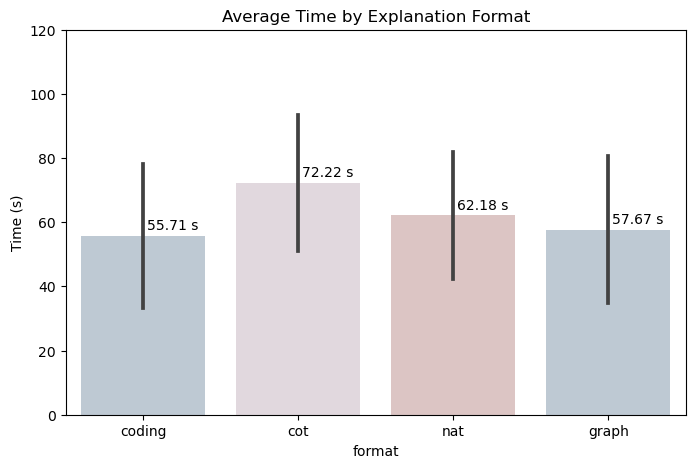

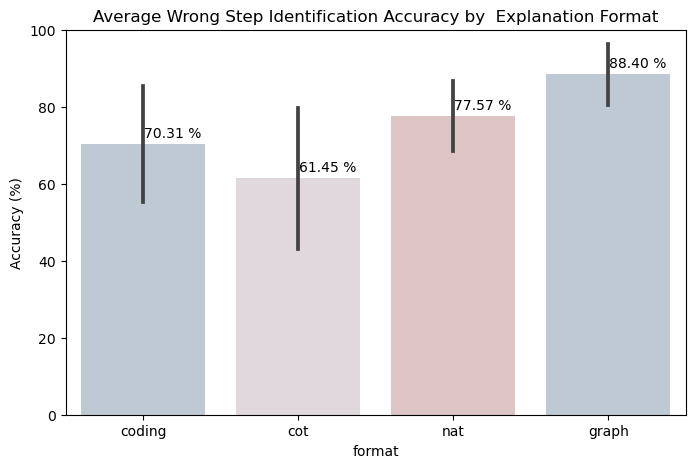

In [765]:
# Plot Accuracy with labels
accuracy = [get_average_accuracy(df_total,"coding"),get_average_accuracy(df_total,"cot"),get_average_accuracy(df_total,"nat"),get_average_accuracy(df_total,"graph")]
time =  [get_average_time(df_total,"coding"), get_average_time(df_total,"cot"),get_average_time(df_total,"nat"),get_average_time(df_total,"graph")]
identification_accuracy = [get_wrong_step_identification_accuracy(df_total,"coding"),get_wrong_step_identification_accuracy(df_total,"cot"),get_wrong_step_identification_accuracy(df_total,"nat"),get_wrong_step_identification_accuracy(df_total,"graph")]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_total,
    x="format",       # column name in df_total
    y="overallAccuracy",     # column name with numeric values
    palette=palette,
    errorbar='sd'           # or "se", "95", etc. (can also set None to disable)
)

plt.title("Average Verification Accuracy by Explanation Format")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 105)
# Add labels on bars
for i, val in enumerate(accuracy):
    plt.text(i+0.2, val + 1, f"{val:.2f}%", ha='center', va='bottom')
plt.savefig("avg_verfication_accuracy_by_format.pdf")

plt.show()


# Plot Time with labels
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_total,
    x="format",       # column name in df_total
    y="average_time",     # column name with numeric values
    palette=palette,
    errorbar= "sd"           # or "se", "95", etc. (can also set None to disable)
)

plt.title("Average Time by Explanation Format")
plt.ylabel("Time (s)")
plt.ylim(0, 120)
# Add labels on bars
for i, val in enumerate(time):
    plt.text(i+0.2, val + 1, f"{val:.2f} s ", ha='center', va='bottom')
plt.savefig("avg_time_by_format.pdf")
plt.show()


# Plot Time with labels
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df_total,
    x="format",       # column name in df_total
    y="wrong_step_accuracy",     # column name with numeric values
    palette=palette,
    errorbar= "sd"        
)


plt.title("Average Wrong Step Identification Accuracy by  Explanation Format")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)
# Add labels on bars
for i, val in enumerate(identification_accuracy):
    plt.text(i+0.2, val + 1, f"{val:.2f} % ", ha='center', va='bottom')
plt.savefig("avg_wrong_step_id_accuracy_by_format.pdf")
plt.show()



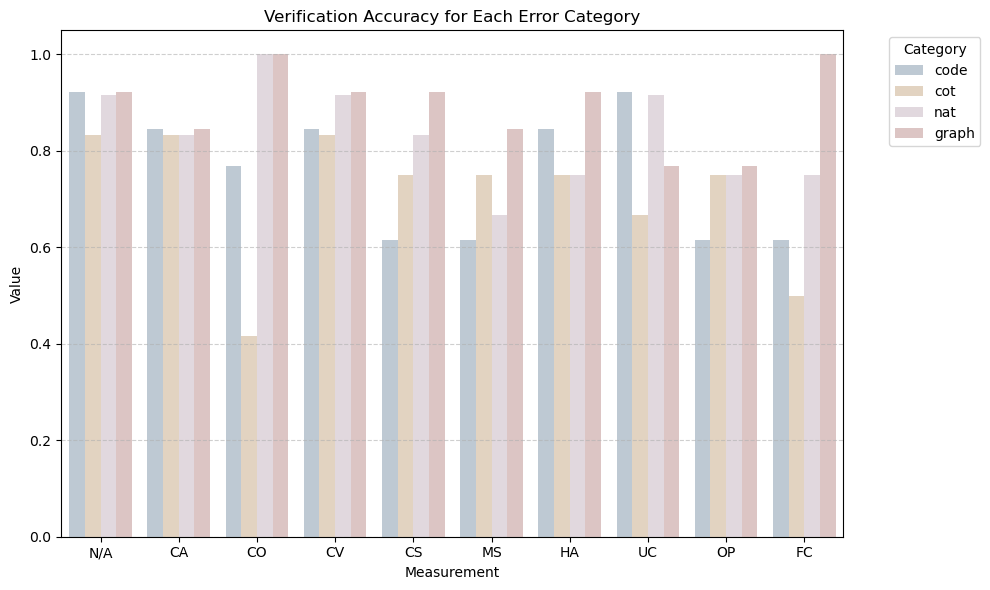

In [766]:
## Verification Accuracy for Each Error Category
categories = ["code", "cot", "nat", "graph"]
measurements = ["N/A", "CA", "CO", "CV", "CS", "MS", "HA", "UC", "OP", "FC"]

# verification accuracy: shape = 9 groups × 4 categories
values = np.array([[verified_NA_coding, verified_NA_cot,verified_NA_nat, verified_NA_graph],
                  [verified_CA_coding, verified_CA_cot,verified_CA_nat, verified_CA_graph],
                  [verified_CO_coding, verified_CO_cot,verified_CO_nat, verified_CO_graph],
                  [verified_CV_coding, verified_CV_cot,verified_CV_nat, verified_CV_graph],
                  [verified_CS_coding, verified_CS_cot,verified_CS_nat, verified_CS_graph],
                  [verified_MS_coding, verified_MS_cot,verified_MS_nat, verified_MS_graph],
                  [verified_HA_coding, verified_HA_cot,verified_HA_nat, verified_HA_graph],
                  [verified_UC_coding, verified_UC_cot,verified_UC_nat, verified_UC_graph],
                  [verified_OP_coding, verified_OP_cot,verified_OP_nat, verified_OP_graph],
                  [verified_FC_coding, verified_FC_cot,verified_FC_nat, verified_FC_graph]])

# Convert to long-form DataFrame
df_stats = pd.DataFrame(values, columns=categories)
df_stats["measurement"] = measurements
df_melted = df_stats.melt(id_vars="measurement", var_name="category", value_name="value")

import seaborn as sns
import matplotlib.pyplot as plt

palette = ["#bac9d7", "#e8d3bb", "#e2d7df", "#e0c1c0"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_melted,
    x="measurement",     # 9 groups
    y="value",           # numeric values
    hue="category",      # 4 bars per group
    palette=palette,
    errorbar=None,       # disable default error bars
    dodge=True           # side-by-side grouping
)
plt.title("Verification Accuracy for Each Error Category")
plt.ylabel("Value")
plt.xlabel("Measurement")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("verification_accuracy_by_error_category.pdf")
plt.show()


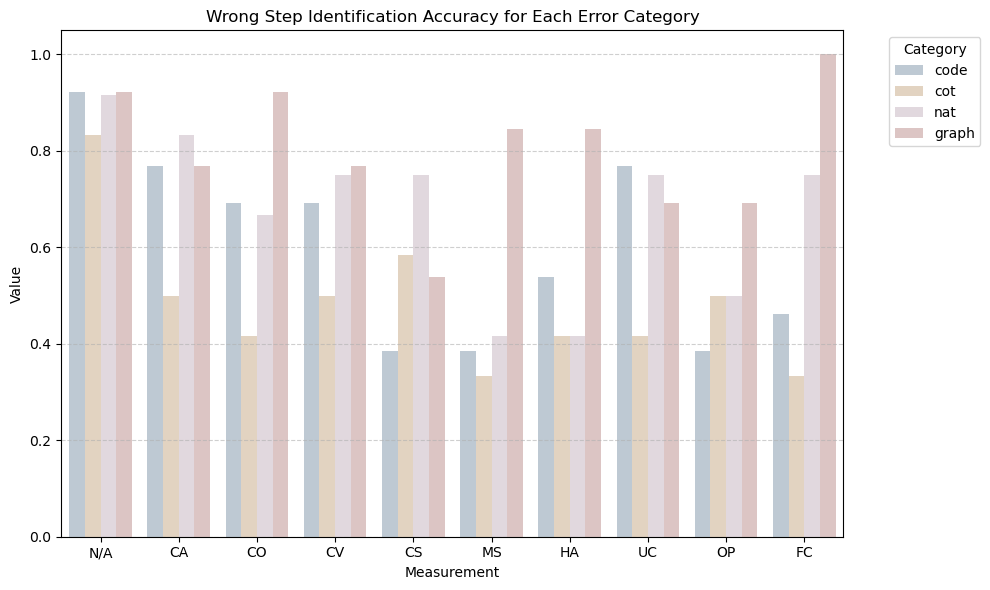

In [767]:
## Wrong Step Identification Accuracy for Each Error Category
categories = ["code", "cot", "nat", "graph"]
measurements = ["N/A", "CA", "CO", "CV", "CS", "MS", "HA", "UC", "OP", "FC"]

# wrong step idnetitifaction accuracy = 9 groups × 4 categories
values = np.array([[step_NA_coding, step_NA_cot,step_NA_nat, step_NA_graph],
                  [step_CA_coding, step_CA_cot,step_CA_nat, step_CA_graph],
                  [step_CO_coding, step_CO_cot,step_CO_nat, step_CO_graph],
                  [step_CV_coding, step_CV_cot,step_CV_nat, step_CV_graph],
                  [step_CS_coding, step_CS_cot,step_CS_nat, step_CS_graph],
                  [step_MS_coding, step_MS_cot,step_MS_nat, step_MS_graph],
                  [step_HA_coding, step_HA_cot,step_HA_nat, step_HA_graph],
                  [step_UC_coding, step_UC_cot,step_UC_nat, step_UC_graph],
                  [step_OP_coding, step_OP_cot,step_OP_nat, step_OP_graph],
                  [step_FC_coding, step_FC_cot,step_FC_nat, step_FC_graph]])

# Convert to long-form DataFrame
df_stats = pd.DataFrame(values, columns=categories)
df_stats["measurement"] = measurements
df_melted = df_stats.melt(id_vars="measurement", var_name="category", value_name="value")

import seaborn as sns
import matplotlib.pyplot as plt

palette = ["#bac9d7", "#e8d3bb", "#e2d7df", "#e0c1c0"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_melted,
    x="measurement",     # 9 groups
    y="value",           # numeric values
    hue="category",      # 4 bars per group
    palette=palette,
    errorbar=None,       # disable default error bars
    dodge=True           # side-by-side grouping
)
plt.title("Wrong Step Identification Accuracy for Each Error Category")
plt.ylabel("Value")
plt.xlabel("Measurement")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("wrong_step_identification_accuracy_by_error_category.pdf")
plt.show()


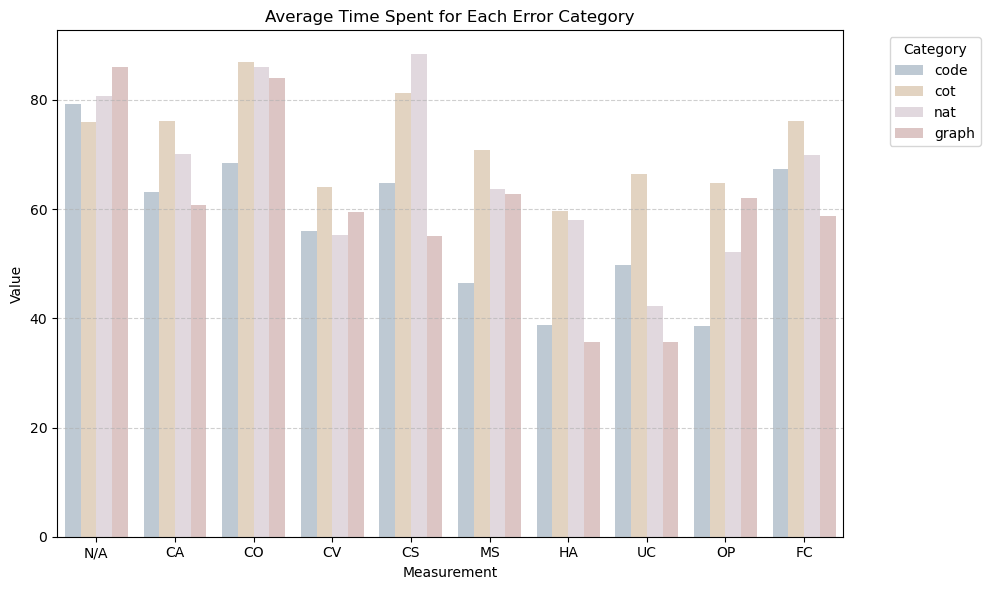

In [768]:
# Average Time Spent for Each Error Category: 
categories = ["code", "cot", "nat", "graph"]
measurements = ["N/A", "CA", "CO", "CV", "CS", "MS", "HA", "UC", "OP", "FC"]

# Example data: shape = 9 groups × 4 categories
values = np.array([[time_NA_coding, time_NA_cot,time_NA_nat, time_NA_graph],
                  [time_CA_coding, time_CA_cot,time_CA_nat, time_CA_graph],
                  [time_CO_coding, time_CO_cot,time_CO_nat, time_CO_graph],
                  [time_CV_coding, time_CV_cot,time_CV_nat, time_CV_graph],
                  [time_CS_coding, time_CS_cot,time_CS_nat, time_CS_graph],
                  [time_MS_coding, time_MS_cot,time_MS_nat, time_MS_graph],
                  [time_HA_coding, time_HA_cot,time_HA_nat, time_HA_graph],
                  [time_UC_coding, time_UC_cot,time_UC_nat, time_UC_graph],
                  [time_OP_coding, time_OP_cot,time_OP_nat, time_OP_graph],
                  [time_FC_coding, time_FC_cot,time_FC_nat, time_FC_graph]])

# Convert to long-form DataFrame
df_stats = pd.DataFrame(values, columns=categories)
df_stats["measurement"] = measurements
df_melted = df_stats.melt(id_vars="measurement", var_name="category", value_name="value")

import seaborn as sns
import matplotlib.pyplot as plt

palette = ["#bac9d7", "#e8d3bb", "#e2d7df", "#e0c1c0"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_melted,
    x="measurement",     # 9 groups
    y="value",           # numeric values
    hue="category",      # 4 bars per group
    palette=palette,
    errorbar=None,       # disable default error bars
    dodge=True           # side-by-side grouping
)
plt.title("Average Time Spent for Each Error Category")
plt.ylabel("Value")
plt.xlabel("Measurement")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("average_time_spent_by_error_category.pdf")
plt.show()


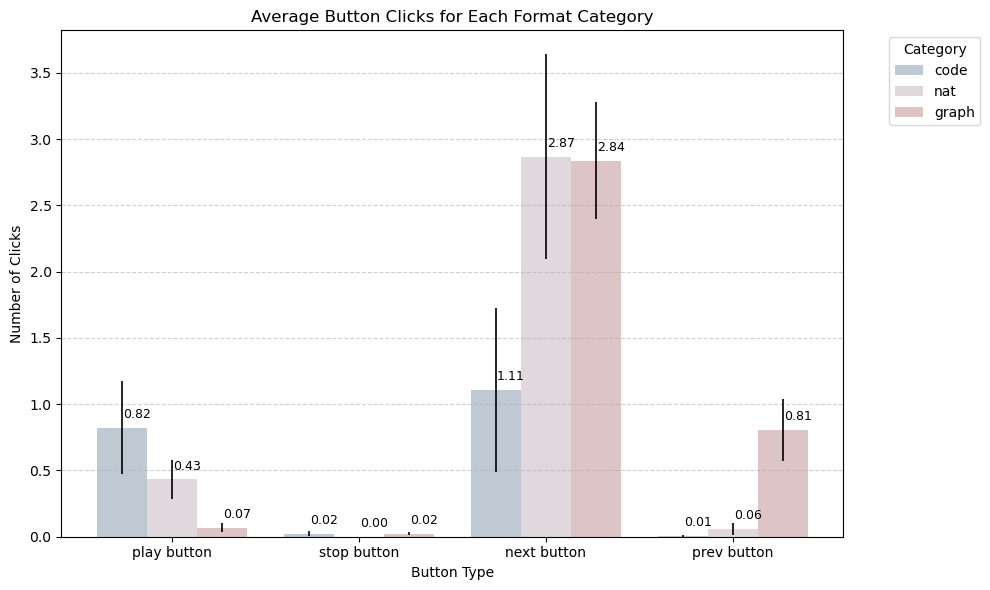

In [769]:
# Average click of button for each format Category: 
categories = ["code", "nat", "graph"]
measurements = ["play button", "stop button", "next button", "prev button"]
# average clicks
avg_play_button_click_graph,avg_stop_button_click_graph,avg_next_button_click_graph,avg_prev_button_click_graph = get_button_stats(df_total, "graph")
avg_play_button_click_nat,avg_stop_button_click_nat,avg_next_button_click_nat,avg_prev_button_click_nat = get_button_stats(df_total, "nat")
avg_play_button_click_coding,avg_stop_button_click_coding,avg_next_button_click_coding,avg_prev_button_click_coding = get_button_stats(df_total, "coding")
# std for clicks

std_play_button_click_graph,std_stop_button_click_graph,std_next_button_click_graph,std_prev_button_click_graph = get_button_stats_se(df_total, "graph")
std_play_button_click_nat,std_stop_button_click_nat,std_next_button_click_nat,std_prev_button_click_nat = get_button_stats_se(df_total, "nat")
std_play_button_click_coding,std_stop_button_click_coding,std_next_button_click_coding,std_prev_button_click_coding = get_button_stats_se(df_total, "coding")

# Example data: shape = 4 groups × 3 categories
values = np.array([[avg_play_button_click_coding, avg_play_button_click_nat, avg_play_button_click_graph],
                  [avg_stop_button_click_coding, avg_stop_button_click_nat, avg_stop_button_click_graph],
                  [avg_next_button_click_coding, avg_next_button_click_nat, avg_next_button_click_graph],
                  [avg_prev_button_click_coding, avg_prev_button_click_nat, avg_prev_button_click_graph]])

errors = np.array([[std_play_button_click_coding, std_play_button_click_nat, std_play_button_click_graph],
                  [std_stop_button_click_coding, std_stop_button_click_nat, std_stop_button_click_graph],
                  [std_next_button_click_coding, std_next_button_click_nat, std_next_button_click_graph],
                  [std_prev_button_click_coding, std_prev_button_click_nat, std_prev_button_click_graph]])

# Convert to long-form DataFrame
df_stats = pd.DataFrame(values, columns=categories)
df_stats["measurement"] = measurements
df_melted = df_stats.melt(id_vars="measurement", var_name="category", value_name="value")

# Melt errors in the same order as df_melted
df_err = pd.DataFrame(errors, columns=categories)
df_err["measurement"] = measurements
df_err_melted = df_err.melt(id_vars="measurement", var_name="category", value_name="err")

palette = ["#bac9d7", "#e2d7df", "#e0c1c0"]

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=df_melted,
    x="measurement",     # 9 groups
    y="value",           # numeric values
    hue="category",      # 4 bars per group
    palette=palette,
    errorbar=None ,     # disable default error bars
    dodge=True           # side-by-side grouping
)

# Number of measurement groups
measurements_unique = df_melted["measurement"].unique()
categories_unique = df_melted["category"].unique()

# Width offset for each bar in a group
group_width = 0.8          # total width of a group
bar_width = group_width / len(categories_unique)

for i, measurement in enumerate(measurements_unique):
    for j, category in enumerate(categories_unique):
        # Find the mean and error
        mean_val = df_melted[(df_melted.measurement == measurement) & 
                             (df_melted.category == category)]["value"].values[0]
        err_val = df_err_melted[(df_err_melted.measurement == measurement) & 
                                (df_err_melted.category == category)]["err"].values[0]

        # Compute bar center x coordinate
        x_pos = i - group_width/2 + (j+0.5)*bar_width

        # Draw error bar
        plt.errorbar(
            x=x_pos,
            y=mean_val,
            yerr=err_val,
            fmt='none',
            ecolor='black',
            elinewidth=1.2,
            capsize=0,
            capthick=0,
            zorder=10
        )
        plt.text(
            x_pos + 0.08,
            mean_val + 0.05,      # small vertical offset
            f"{mean_val:.2f}",    # format label text
            ha='center',
            va='bottom',
            fontsize=9
        )




plt.title("Average Button Clicks for Each Format Category")
plt.ylabel("Number of Clicks")
plt.xlabel("Button Type")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig("average_button_click_per_format_category.pdf")
plt.show()

In [770]:
# add behavior plot where the students clicked on different buttons
# add the error bar. 
# add the accuracy for each error type 
# accuracy for selecting the wrong steps
# across the study, summarize the stats for the incorrect and correct questions. (button click, time spent)
# repeat the same for corrrect incorrect step questions.
# randomize the questions 
# add the post survey questions. 